In [186]:
#to work with dataframes/tables
import pandas as pd

#to work with multidimensional numerical arrays with some maths functions
import numpy as np  

#for visualization purpose
import matplotlib.pyplot as plt    
import seaborn as sns

#to avoid future warnings
import warnings
warnings.filterwarnings('ignore')

In [120]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
test_sub = pd.read_csv("sample_submission.csv")

In [121]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [122]:
train.head()

patient_id  tumor_cell_count  gender age_group   race  \
0  TCBA-B8-0x204   7                 Male    60-64     NaN     
1  TCBA-B8-0x1063  1                 Male    85-89     White   
2  TCBA-B8-0xb7d   1                 Female  70-74     White   
3  TCBA-B8-0xfa7   104               Female  65-69     White   
4  TCBA-B8-0xdc    21                Male    50-54     White   

   year_of_diagnosis  morphology_code  year_of_death  smoke_units  area_code  \
0  2010               81403            2016.0         34           2           
1  2012               80463            2016.0         4            7           
2  2013               80103            2018.0         20           1           
3  2013               80463            2018.0         20           5           
4  2010               80463            2016.0         20           5           

   alcohol_consume_units                       symptoms  symptom1  symptom2  \
0  2                      Dry eye                        0.0       0.0        
1  5                      Calm                           0.0       0.0        
2  4                      Allergies                      0.0       0.0        
3  3                      Gabapentin                     0.0       0.0        
4  2                      Obsessive-compulsive disorder  0.0       0.0        

   symptom3  symptom4  symptom5  symptom6  symptom7  symptom8  symptom9  \
0  0.0       0.0       0.0       0.0       0.0       0.0       0.0        
1  0.0       0.0       0.0       0.0       0.0       0.0       0.0        
2  0.0       0.0       0.0       0.0       1.0       0.0       0.0        
3  0.0       0.0       0.0       0.0       1.0       0.0       0.0        
4  0.0       1.0       0.0       0.0       1.0       0.0       0.0        

   symptom10  symptom11  symptom12  symptom13  symptom14  symptom15  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  0.0        0.0        0.0        0.0        0.0        0.0         
3  0.0        0.0        0.0        0.0        0.0        0.0         
4  0.0        0.0        0.0        0.0        0.0        1.0         

   symptom16  symptom17  symptom18  symptom19  symptom20  symptom21  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  0.0        0.0        0.0        0.0        0.0        0.0         
3  0.0        0.0        0.0        0.0        0.0        0.0         
4  1.0        0.0        0.0        0.0        0.0        0.0         

   symptom22  symptom23  symptom24  symptom25  symptom26  symptom27  \
0  0.0        0.0        0.0        0.0        0.0        1.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  0.0        0.0        0.0        0.0        0.0        0.0         
3  0.0        0.0        0.0        0.0        0.0        0.0         
4  0.0        0.0        0.0        0.0        0.0        0.0         

   symptom28  symptom29  symptom30  symptom31  symptom32  symptom33  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  0.0        0.0        0.0        1.0        1.0        0.0         
3  0.0        0.0        0.0        1.0        1.0        0.0         
4  0.0        0.0        0.0        0.0        0.0        0.0         

   symptom34  symptom35  symptom36  symptom37  symptom38  symptom39  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  0.0        0.0        0.0        0.0        0.0        0.0         
3  0.0        0.0        0.0        0.0        0.0        0.0         
4  0.0        0.0        0.0        0.0        0.0        0.0         

   symptom40  symptom50  symptom51  symptom52  symptom53  symptom54  \
0  0.0   

In [123]:
sum(train.duplicated())

0

In [124]:
test.head()

patient_id  tumor_cell_count gender age_group   race  \
0  TCBA-B8-0x7e9   1                 Male   85-89     White   
1  TCBA-B8-0x6bc   1                 Male   80-84     White   
2  TCBA-B8-0x1195  1                 Male   60-64     White   
3  TCBA-B8-0x8a5   1                 Male   85-89     White   
4  TCBA-B8-0xa21   1                 Male   85-89     White   

   year_of_diagnosis  morphology_code  year_of_death  smoke_units  area_code  \
0  2009               80003            2014.0         25           4           
1  2013               82503            2020.0         12           8           
2  2013               80703            2017.0         3            5           
3  2013               80103            2018.0         20           5           
4  2009               80003           NaN             25           2           

   alcohol_consume_units       symptoms  symptom1  symptom2  symptom3  \
0  4                      Humira         0.0       0.0       0.0        
1  3                      Sleeplessness  0.0       0.0       0.0        
2  6                      Back pain      0.0       0.0       0.0        
3  0                      Depression     1.0       0.0       0.0        
4  8                      Neck pain      0.0       0.0       0.0        

   symptom4  symptom5  symptom6  symptom7  symptom8  symptom9  symptom10  \
0  0.0       0.0       1.0       0.0       0.0       0.0       0.0         
1  0.0       0.0       0.0       0.0       0.0       0.0       0.0         
2  0.0       0.0       0.0       1.0       0.0       1.0       1.0         
3  0.0       0.0       0.0       0.0       0.0       0.0       0.0         
4  0.0       0.0       0.0       0.0       0.0       0.0       0.0         

   symptom11  symptom12  symptom13  symptom14  symptom15  symptom16  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  0.0        0.0        1.0        0.0        0.0        0.0         
3  0.0        0.0        0.0        0.0        0.0        0.0         
4  0.0        0.0        0.0        0.0        0.0        0.0         

   symptom17  symptom18  symptom19  symptom20  symptom21  symptom22  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        1.0        0.0        0.0        0.0         
2  0.0        0.0        1.0        0.0        0.0        0.0         
3  0.0        0.0        0.0        0.0        0.0        0.0         
4  0.0        0.0        0.0        0.0        0.0        0.0         

   symptom23  symptom24  symptom25  symptom26  symptom27  symptom28  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  0.0        0.0        0.0        0.0        0.0        1.0         
3  1.0        0.0        0.0        0.0        0.0        0.0         
4  0.0        0.0        0.0        0.0        1.0        0.0         

   symptom29  symptom30  symptom31  symptom32  symptom33  symptom34  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  0.0        0.0        0.0        0.0        0.0        0.0         
3  0.0        0.0        0.0        0.0        0.0        0.0         
4  0.0        0.0        0.0        0.0        0.0        0.0         

   symptom35  symptom36  symptom37  symptom38  symptom39  symptom40  \
0  0.0        0.0        0.0        0.0        0.0        0.0         
1  0.0        0.0        0.0        0.0        0.0        0.0         
2  1.0        0.0        0.0        1.0        0.0        0.0         
3  0.0        0.0        0.0        0.0        0.0        0.0         
4  0.0        0.0        0.0        0.0        0.0        0.0         

   symptom50  symptom51  symptom52  symptom53  symptom54  symptom55  \
0  1.0        0.0        0.0        0.0      

In [125]:
dfs = [train, test]
train.name = "Training set"
test.name = "Testing set"

In [126]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training set
patient_id column missing values: 0
tumor_cell_count column missing values: 0
gender column missing values: 0
age_group column missing values: 25
race column missing values: 303
year_of_diagnosis column missing values: 0
morphology_code column missing values: 0
year_of_death column missing values: 402
smoke_units column missing values: 0
area_code column missing values: 0
alcohol_consume_units column missing values: 0
symptoms column missing values: 0
symptom1 column missing values: 0
symptom2 column missing values: 0
symptom3 column missing values: 0
symptom4 column missing values: 0
symptom5 column missing values: 0
symptom6 column missing values: 0
symptom7 column missing values: 0
symptom8 column missing values: 0
symptom9 column missing values: 0
symptom10 column missing values: 0
symptom11 column missing values: 0
symptom12 column missing values: 0
symptom13 column missing values: 0
symptom14 column missing values: 0
symptom15 column missing values: 0
symptom16 colum

In [127]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [128]:
train['gender']=le.fit_transform(train.gender)
test['gender']=le.fit_transform(test.gender )


<AxesSubplot:xlabel='gender', ylabel='count'>

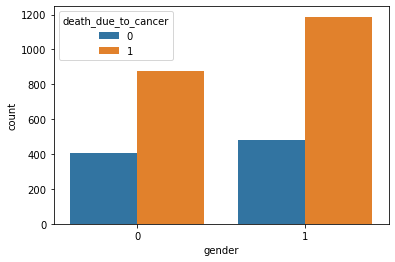

In [129]:
sns.countplot(data=train,x='gender',hue='death_due_to_cancer')

In [130]:
a=pd.unique(train['age_group'])
print(a)
len(a)


['60-64' '85-89' '70-74' '65-69' '50-54' '75-79' '80-84' '55-59' '90+'
 '40-44' '45-49' nan '00-39']


13

In [131]:
mapping={'00-39':0,'40-44':1,'45-49':2,'50-54':3,'55-59':4,'60-64':5,'65-69':6,'70-74':7,'75-79':8,'80-84':9,'85-89':10,'90+':11}
train['age_gr']=train['age_group'].map(mapping)


In [248]:
mapping={'00-39':0,'40-44':1,'45-49':2,'50-54':3,'55-59':4,'60-64':5,'65-69':6,'70-74':7,'75-79':8,'80-84':9,'85-89':10,'90+':11}
test['age_gr']=test['age_group'].map(mapping)

<AxesSubplot:xlabel='age_gr', ylabel='count'>

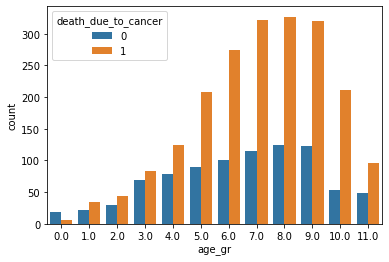

In [132]:
sns.countplot(data=train,x='age_gr',hue='death_due_to_cancer')

<AxesSubplot:>

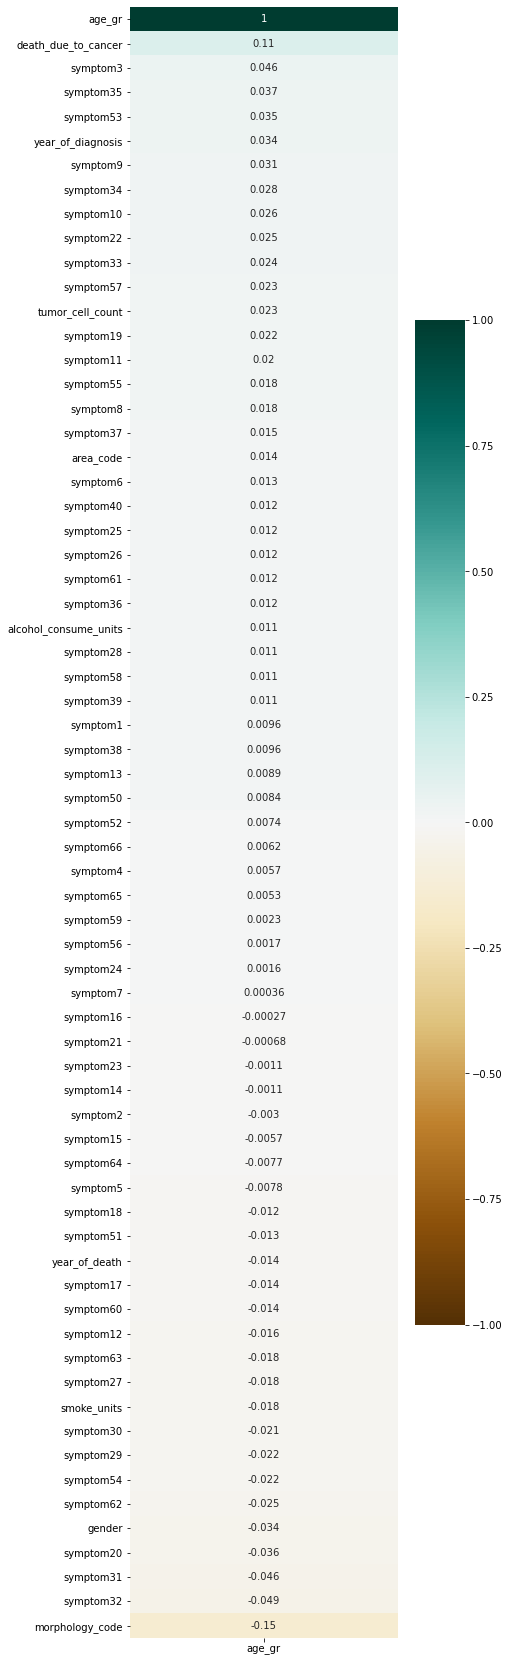

In [133]:
plt.figure(figsize=(6,30))
sns.heatmap(train.corr()[['age_gr']].sort_values(by='age_gr',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='BrBG')

In [134]:
print(train.morphology_code.value_counts())

81403    554
80103    510
80703    406
80003    389
80463    323
80413    227
82463    62 
80123    56 
80713    53 
85603    45 
82403    43 
82503    43 
84803    24 
85503    22 
82603    21 
80423    18 
80453    14 
80333    14 
84813    13 
80203    13 
80723    11 
88003    10 
83103    9  
80223    6  
80323    6  
80733    4  
89803    4  
88103    4  
85703    4  
84303    4  
89723    4  
82513    3  
82493    2  
82443    2  
83233    2  
82113    2  
80213    2  
88013    2  
80013    2  
87203    1  
82003    1  
80743    1  
89633    1  
81409    1  
81233    1  
89203    1  
80833    1  
84903    1  
80763    1  
88113    1  
88903    1  
80503    1  
80443    1  
80433    1  
80313    1  
80303    1  
80109    1  
88023    1  
Name: morphology_code, dtype: int64


In [135]:
train['age_gr'].fillna(99, inplace = True)

In [250]:
test['age_gr'].fillna(99, inplace = True)

In [136]:
pd.crosstab([train.age_gr,train.death_due_to_cancer],[train.morphology_code],margins=True).T.style.background_gradient()

In [137]:
train.loc[(train.age_gr==99 )&(train.morphology_code==80003),'age_gr']=11
train.loc[(train.age_gr==99 )&(train.morphology_code==80103),'age_gr']=8
train.loc[(train.age_gr==99 )&(train.morphology_code==80203),'age_gr']=0
train.loc[(train.age_gr==99 )&(train.morphology_code==80413),'age_gr']=8
train.loc[(train.age_gr==99 )&(train.morphology_code==80703) &(train.death_due_to_cancer==0),'age_gr']=9
train.loc[(train.age_gr==99 )&(train.morphology_code==80703) &(train.death_due_to_cancer==1),'age_gr']=7
train.loc[(train.age_gr==99 )&(train.morphology_code==81403),'age_gr']=8
train.loc[(train.age_gr==99 )&(train.morphology_code==82413),'age_gr']=5
train.loc[(train.age_gr==99 )&(train.morphology_code==80463),'age_gr']=3
train.loc[(train.age_gr==99 ),'age_gr']=8


In [252]:
test.loc[(test.age_gr==99),'age_gr']=8


In [140]:
mapping={'White':0,'Asian':1,'Black':2,'Mixed':3,'OtherEth':4,'Chinese':5}
train['race_gr']=train['race'].map(mapping)

In [254]:
mapping={'White':0,'Asian':1,'Black':2,'Mixed':3,'OtherEth':4,'Chinese':5}
test['race_gr']=test['race'].map(mapping)

<AxesSubplot:>

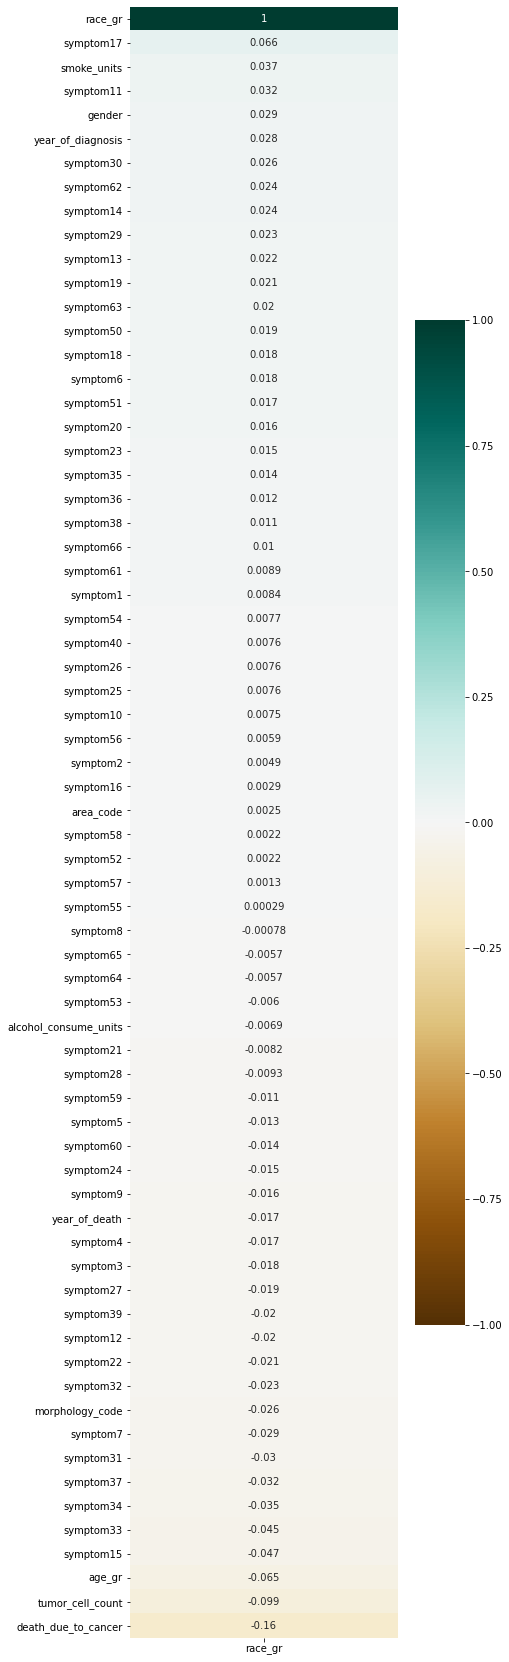

In [142]:
plt.figure(figsize=(6,30))
sns.heatmap(train.corr()[['race_gr']].sort_values(by='race_gr',ascending= False ), vmin=-1,vmax=1,annot= True ,cmap='BrBG')

In [13]:
from pandas_profiling import ProfileReport

prof = ProfileReport(train) 
prof.to_file(output_file='output.html')

In [14]:
prof

<AxesSubplot:>

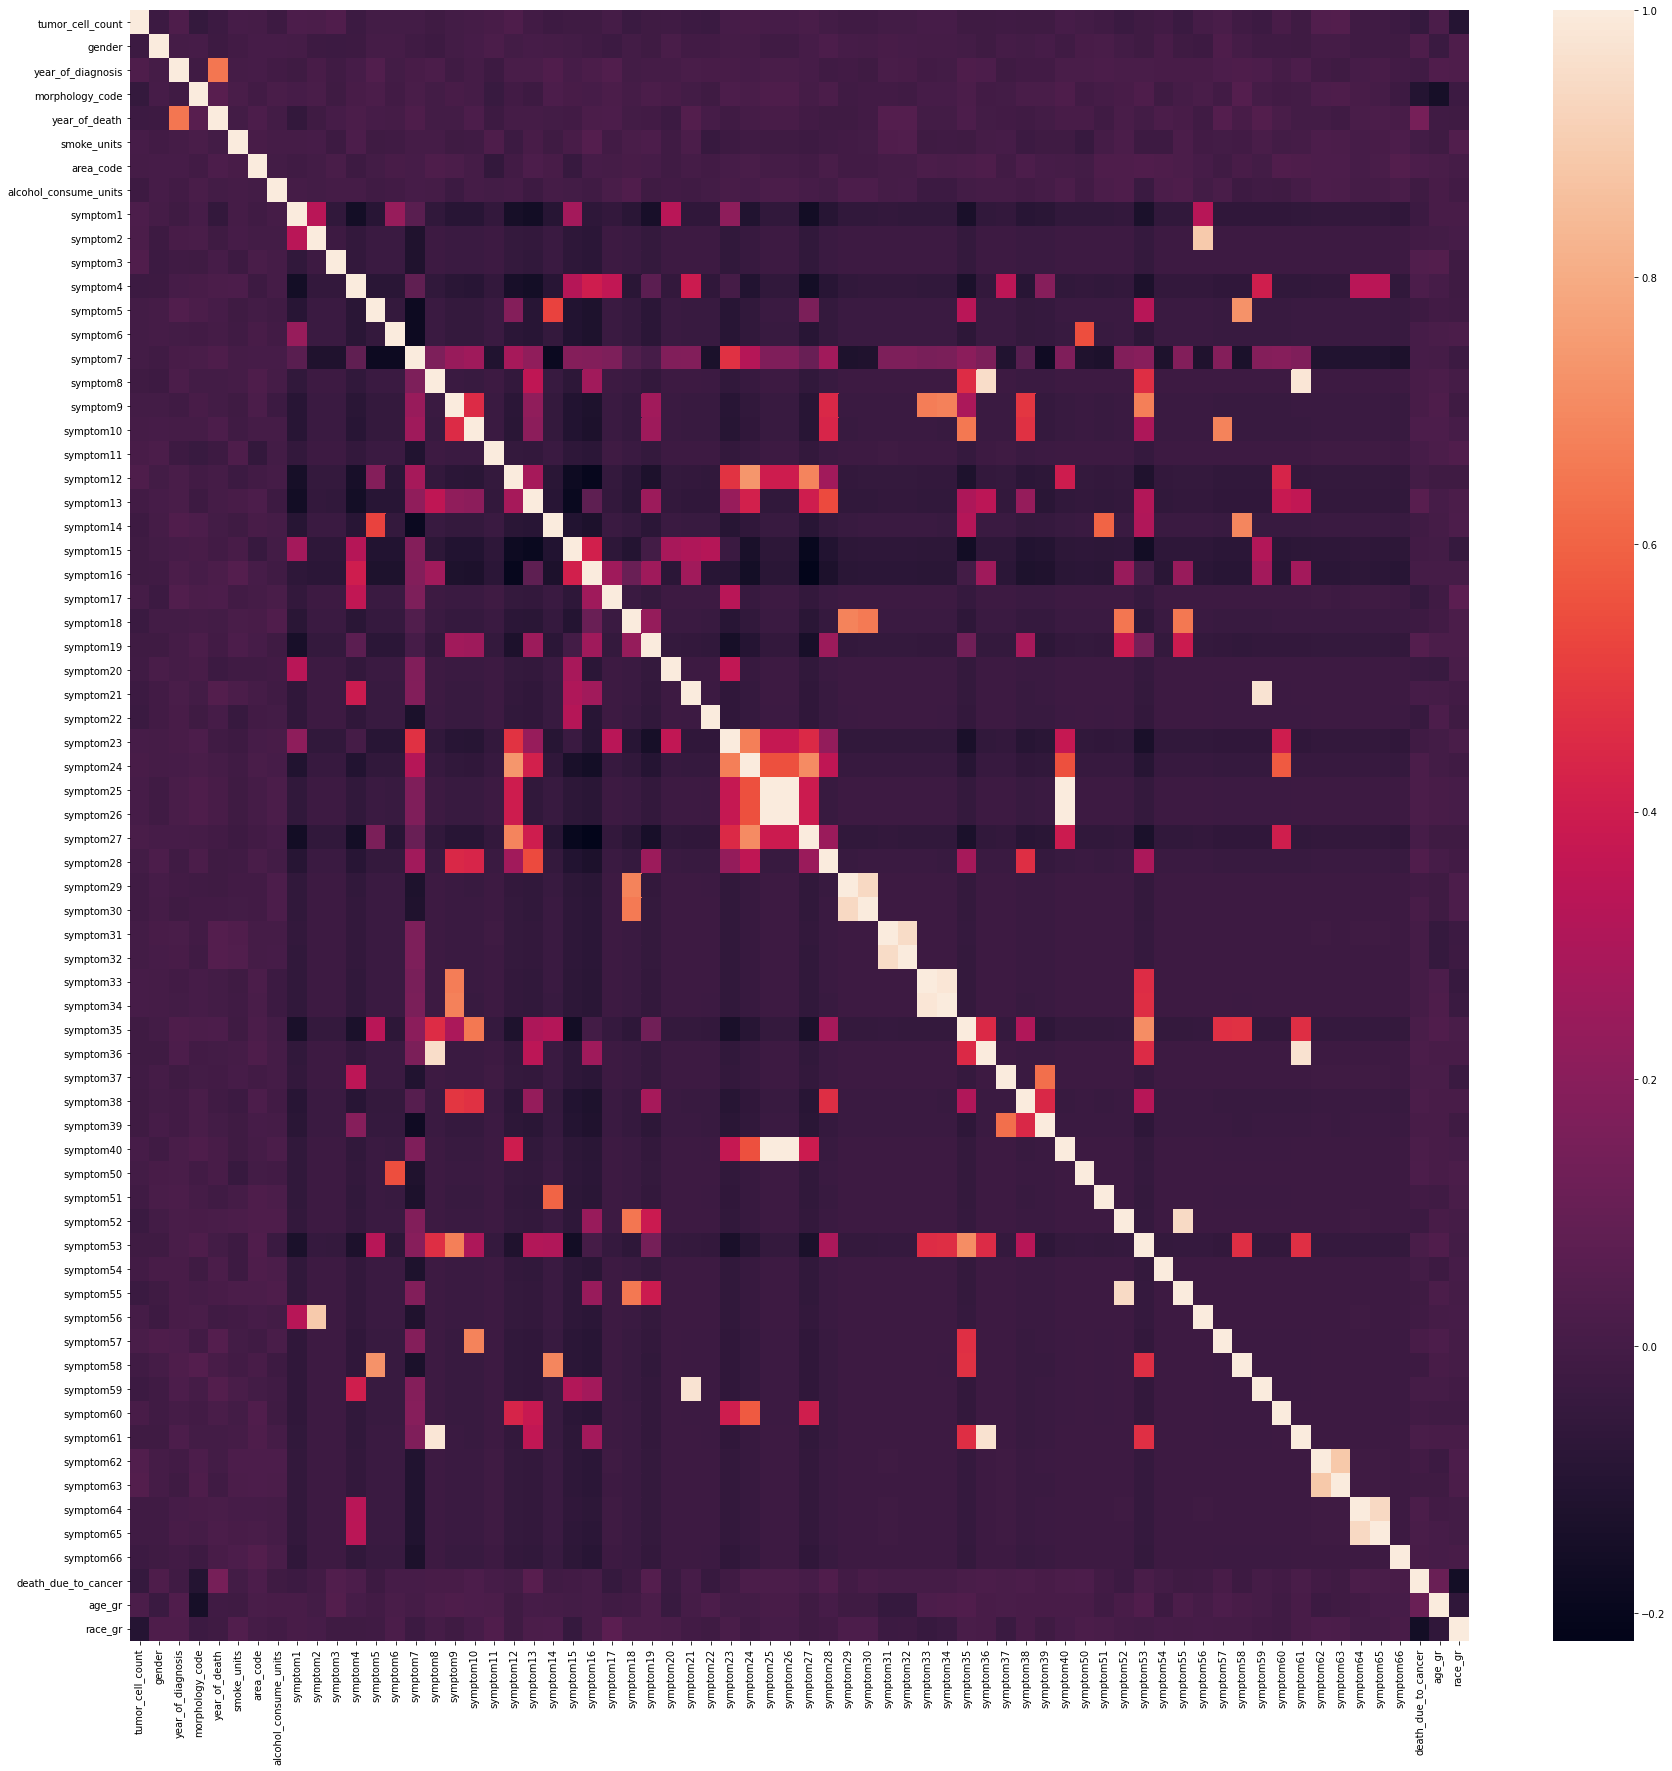

In [150]:
plt.figure(figsize=(30,30))

sns.heatmap(train.corr())

In [175]:
#to split our data set into training set and testing set
from sklearn.model_selection import cross_val_score,train_test_split

#training algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
\
# metrics to evaluate our model
from sklearn.metrics import accuracy_score, f1_score



In [159]:
x= train.drop(["death_due_to_cancer",'patient_id','age_group','year_of_death','area_code','race','race_gr','symptoms'], axis=1)
y=train['death_due_to_cancer']

In [255]:
testdf=test.drop(['patient_id','age_group','year_of_death','area_code','race','race_gr','symptoms'], axis=1)

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [179]:
lc=LogisticRegression()
lc.fit(x_train,y_train)
predict=lc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('F1 - Score: ',100* f1_score(y_test,predict))

Accuracy Score:  0.6817155756207675
F1 - Score:  80.79019073569482


In [168]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
predict=dc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('F1 - Score: ',100* f1_score(y_test,predict))


Accuracy Score:  0.6230248306997742
F1 - Score:  73.3652312599681


In [169]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
predict=rc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('F1 - Score: ',100* f1_score(y_test,predict))


Accuracy Score:  0.6817155756207675
F1 - Score:  79.8283261802575


In [172]:
sc=SVC()
sc.fit(x_train,y_train)
predict=sc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('F1 - Score: ',100* f1_score(y_test,predict))


Accuracy Score:  0.6941309255079007
F1 - Score:  81.94536975349766


In [174]:
kc=KNeighborsClassifier()
kc.fit(x_train,y_train)
predict=kc.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('F1 - Score: ',100* f1_score(y_test,predict))


Accuracy Score:  0.6783295711060948
F1 - Score:  78.99778924097274


In [176]:
gb=GaussianNB()
gb.fit(x_train,y_train)
predict=gb.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('F1 - Score: ',100* f1_score(y_test,predict))


Accuracy Score:  0.5677200902934537
F1 - Score:  68.16292601828762


In [188]:
from xgboost import XGBClassifier


In [189]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
predict=xg.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('F1 - Score: ',100* f1_score(y_test,predict))

[13:28:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  0.6557562076749436
F1 - Score:  77.08489857250188


In [190]:
from catboost import CatBoostClassifier
ct=CatBoostClassifier()
ct.fit(x_train,y_train)
predict=ct.predict(x_test)
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('F1 - Score: ',100* f1_score(y_test,predict))

Learning rate set to 0.014044
0:	learn: 0.6901766	total: 307ms	remaining: 5m 6s
1:	learn: 0.6871179	total: 312ms	remaining: 2m 35s
2:	learn: 0.6846754	total: 317ms	remaining: 1m 45s
3:	learn: 0.6816587	total: 322ms	remaining: 1m 20s
4:	learn: 0.6789168	total: 328ms	remaining: 1m 5s
5:	learn: 0.6767103	total: 332ms	remaining: 55s
6:	learn: 0.6744117	total: 336ms	remaining: 47.6s
7:	learn: 0.6721558	total: 340ms	remaining: 42.2s
8:	learn: 0.6696809	total: 344ms	remaining: 37.9s
9:	learn: 0.6674939	total: 348ms	remaining: 34.5s
10:	learn: 0.6651774	total: 352ms	remaining: 31.7s
11:	learn: 0.6627884	total: 356ms	remaining: 29.3s
12:	learn: 0.6607990	total: 364ms	remaining: 27.6s
13:	learn: 0.6590013	total: 370ms	remaining: 26.1s
14:	learn: 0.6567867	total: 376ms	remaining: 24.7s
15:	learn: 0.6542530	total: 381ms	remaining: 23.5s
16:	learn: 0.6524802	total: 387ms	remaining: 22.4s
17:	learn: 0.6500926	total: 393ms	remaining: 21.4s
18:	learn: 0.6483936	total: 399ms	remaining: 20.6s
19:	learn:

162:	learn: 0.5504344	total: 1.16s	remaining: 5.94s
163:	learn: 0.5501786	total: 1.16s	remaining: 5.92s
164:	learn: 0.5499599	total: 1.17s	remaining: 5.91s
165:	learn: 0.5496210	total: 1.17s	remaining: 5.89s
166:	learn: 0.5493859	total: 1.18s	remaining: 5.88s
167:	learn: 0.5490319	total: 1.18s	remaining: 5.86s
168:	learn: 0.5487331	total: 1.19s	remaining: 5.84s
169:	learn: 0.5483439	total: 1.19s	remaining: 5.82s
170:	learn: 0.5480954	total: 1.2s	remaining: 5.8s
171:	learn: 0.5478070	total: 1.2s	remaining: 5.78s
172:	learn: 0.5476298	total: 1.2s	remaining: 5.76s
173:	learn: 0.5474624	total: 1.21s	remaining: 5.74s
174:	learn: 0.5472486	total: 1.21s	remaining: 5.72s
175:	learn: 0.5469644	total: 1.22s	remaining: 5.7s
176:	learn: 0.5467034	total: 1.22s	remaining: 5.68s
177:	learn: 0.5463575	total: 1.23s	remaining: 5.67s
178:	learn: 0.5460346	total: 1.23s	remaining: 5.65s
179:	learn: 0.5459482	total: 1.24s	remaining: 5.63s
180:	learn: 0.5457433	total: 1.24s	remaining: 5.61s
181:	learn: 0.545

324:	learn: 0.5142573	total: 1.89s	remaining: 3.92s
325:	learn: 0.5138970	total: 1.89s	remaining: 3.92s
326:	learn: 0.5135616	total: 1.9s	remaining: 3.91s
327:	learn: 0.5133938	total: 1.91s	remaining: 3.9s
328:	learn: 0.5131782	total: 1.91s	remaining: 3.9s
329:	learn: 0.5129926	total: 1.92s	remaining: 3.89s
330:	learn: 0.5128238	total: 1.92s	remaining: 3.89s
331:	learn: 0.5125929	total: 1.93s	remaining: 3.88s
332:	learn: 0.5122781	total: 1.93s	remaining: 3.88s
333:	learn: 0.5121452	total: 1.94s	remaining: 3.87s
334:	learn: 0.5120236	total: 1.94s	remaining: 3.86s
335:	learn: 0.5118870	total: 1.95s	remaining: 3.85s
336:	learn: 0.5117142	total: 1.95s	remaining: 3.84s
337:	learn: 0.5114316	total: 1.96s	remaining: 3.83s
338:	learn: 0.5112301	total: 1.96s	remaining: 3.83s
339:	learn: 0.5110510	total: 1.97s	remaining: 3.82s
340:	learn: 0.5107754	total: 1.97s	remaining: 3.81s
341:	learn: 0.5106432	total: 1.98s	remaining: 3.81s
342:	learn: 0.5104080	total: 1.99s	remaining: 3.8s
343:	learn: 0.51

509:	learn: 0.4806652	total: 2.77s	remaining: 2.66s
510:	learn: 0.4804903	total: 2.77s	remaining: 2.65s
511:	learn: 0.4801679	total: 2.78s	remaining: 2.65s
512:	learn: 0.4799005	total: 2.78s	remaining: 2.64s
513:	learn: 0.4797724	total: 2.79s	remaining: 2.64s
514:	learn: 0.4796580	total: 2.8s	remaining: 2.63s
515:	learn: 0.4795098	total: 2.8s	remaining: 2.63s
516:	learn: 0.4793443	total: 2.81s	remaining: 2.63s
517:	learn: 0.4791986	total: 2.81s	remaining: 2.62s
518:	learn: 0.4788918	total: 2.82s	remaining: 2.61s
519:	learn: 0.4786229	total: 2.82s	remaining: 2.61s
520:	learn: 0.4785198	total: 2.83s	remaining: 2.6s
521:	learn: 0.4783735	total: 2.83s	remaining: 2.59s
522:	learn: 0.4781819	total: 2.84s	remaining: 2.59s
523:	learn: 0.4780730	total: 2.85s	remaining: 2.59s
524:	learn: 0.4779191	total: 2.85s	remaining: 2.58s
525:	learn: 0.4776883	total: 2.86s	remaining: 2.58s
526:	learn: 0.4775329	total: 2.86s	remaining: 2.57s
527:	learn: 0.4773026	total: 2.87s	remaining: 2.56s
528:	learn: 0.4

694:	learn: 0.4438263	total: 3.65s	remaining: 1.6s
695:	learn: 0.4434839	total: 3.66s	remaining: 1.6s
696:	learn: 0.4432570	total: 3.66s	remaining: 1.59s
697:	learn: 0.4431755	total: 3.67s	remaining: 1.59s
698:	learn: 0.4430114	total: 3.67s	remaining: 1.58s
699:	learn: 0.4429505	total: 3.68s	remaining: 1.58s
700:	learn: 0.4426961	total: 3.68s	remaining: 1.57s
701:	learn: 0.4425042	total: 3.69s	remaining: 1.57s
702:	learn: 0.4423591	total: 3.69s	remaining: 1.56s
703:	learn: 0.4422034	total: 3.7s	remaining: 1.55s
704:	learn: 0.4419890	total: 3.7s	remaining: 1.55s
705:	learn: 0.4417623	total: 3.71s	remaining: 1.54s
706:	learn: 0.4415499	total: 3.71s	remaining: 1.54s
707:	learn: 0.4413944	total: 3.72s	remaining: 1.53s
708:	learn: 0.4412220	total: 3.72s	remaining: 1.53s
709:	learn: 0.4411089	total: 3.73s	remaining: 1.52s
710:	learn: 0.4407915	total: 3.73s	remaining: 1.52s
711:	learn: 0.4405754	total: 3.74s	remaining: 1.51s
712:	learn: 0.4402785	total: 3.74s	remaining: 1.51s
713:	learn: 0.43

855:	learn: 0.4122822	total: 4.37s	remaining: 736ms
856:	learn: 0.4121382	total: 4.38s	remaining: 730ms
857:	learn: 0.4119648	total: 4.38s	remaining: 725ms
858:	learn: 0.4118276	total: 4.39s	remaining: 720ms
859:	learn: 0.4116236	total: 4.39s	remaining: 715ms
860:	learn: 0.4114402	total: 4.4s	remaining: 710ms
861:	learn: 0.4112963	total: 4.4s	remaining: 705ms
862:	learn: 0.4110538	total: 4.41s	remaining: 700ms
863:	learn: 0.4108267	total: 4.41s	remaining: 695ms
864:	learn: 0.4106473	total: 4.42s	remaining: 689ms
865:	learn: 0.4104492	total: 4.42s	remaining: 684ms
866:	learn: 0.4102626	total: 4.42s	remaining: 679ms
867:	learn: 0.4100614	total: 4.43s	remaining: 674ms
868:	learn: 0.4097583	total: 4.43s	remaining: 668ms
869:	learn: 0.4095468	total: 4.44s	remaining: 663ms
870:	learn: 0.4093776	total: 4.44s	remaining: 658ms
871:	learn: 0.4092001	total: 4.45s	remaining: 653ms
872:	learn: 0.4089836	total: 4.46s	remaining: 648ms
873:	learn: 0.4088889	total: 4.46s	remaining: 643ms
874:	learn: 0.

In [199]:
import catboost as cb
import optuna


In [270]:
#def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size=0.3,random_state=42)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05),
        'iterations':10000,
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "5gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=200)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy

In [271]:
#study = optuna.create_study(direction="maximize")
#study.optimize(objective, n_trials=50, timeout=600)

[I 2021-11-05 14:47:42,583] A new study created in memory with name: no-name-7d26bed8-6ca0-41d8-bbb5-652a4632ca5b
[I 2021-11-05 14:47:47,279] Trial 0 finished with value: 0.7065462753950339 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.05599538564581065, 'learning_rate': 0.027771526335576342, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9631830414297465}. Best is trial 0 with value: 0.7065462753950339.
[I 2021-11-05 14:47:51,637] Trial 1 finished with value: 0.7009029345372461 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.03818510001089449, 'learning_rate': 0.04257674499847472, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.7112167770839715}. Best is trial 0 with value: 0.7065462753950339.
[I 2021-11-05 14:47:55,737] Trial 2 finished with value: 0.7054176072234764 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07558225180534714, 'le

[I 2021-11-05 14:49:47,183] Trial 23 finished with value: 0.6941309255079007 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.08523239521681532, 'learning_rate': 0.01524508081492439, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7947975456962333}. Best is trial 0 with value: 0.7065462753950339.
[I 2021-11-05 14:49:51,777] Trial 24 finished with value: 0.6918735891647856 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09962484017009524, 'learning_rate': 0.026927163650216353, 'depth': 12, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.35249033811433994}. Best is trial 0 with value: 0.7065462753950339.
[I 2021-11-05 14:49:56,422] Trial 25 finished with value: 0.6941309255079007 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.06007303695994616, 'learning_rate': 0.011341036733755343, 'depth': 10, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0

KeyboardInterrupt: 

In [203]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 50
Best trial:
  Value: 0.7460496613995485
  Params: 
    objective: CrossEntropy
    colsample_bylevel: 0.05030457441931638
    depth: 7
    boosting_type: Ordered
    bootstrap_type: MVS


In [265]:
Params= {
    'objective': 'CrossEntropy',
    'colsample_bylevel': 0.02030457441931638,
    'depth': 7,
    'boosting_type': 'Ordered',
    'bootstrap_type': 'MVS',
    
}

In [266]:
cat = cb.CatBoostClassifier(**Params)
train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size=0.3,random_state=42)
cat.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=500, early_stopping_rounds=100)
preds = cat.predict(valid_x)
pred_labels = np.rint(preds)
accuracy = accuracy_score(valid_y, pred_labels)
print('Accuracy Score: ',accuracy_score(valid_y, pred_labels))
print('F1 - Score: ',100* f1_score(valid_y, pred_labels))

0:	learn: 0.6880420	test: 0.6882252	best: 0.6882252 (0)	total: 10.4ms	remaining: 3m 28s
500:	learn: 0.5656319	test: 0.5908813	best: 0.5908813 (500)	total: 2.45s	remaining: 1m 35s
1000:	learn: 0.5426906	test: 0.5837029	best: 0.5836420 (975)	total: 4.79s	remaining: 1m 30s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.5829721002
bestIteration = 1102

Shrink model to first 1103 iterations.
Accuracy Score:  0.6975169300225733
F1 - Score:  81.74386920980925


In [275]:

predict=cat.predict(testdf)

In [285]:
dft  = pd.read_csv("test.csv")
sub=pd.DataFrame()
sub['patient_id']= dft['patient_id']
sub['death_due_to_cancer']= predict
sub.to_csv('submission_file.csv',index =False)